## Problem Set 3 (Part 1 of 2): Interacting with the Alpha Vantage API using Python libraries

As automation and algorithms continue to disrupt the investment managmentment business, it is important to know how to access finacial data that is realtime and interactive. In this problem set we will access the Alpha Vantage API to build datasets of recent stock performance. Alpha Vantage is a provider of free APIs for realtime and historical data on stocks, forex, and cryptocurrencies.

This part of the exercise demonstrates:

1. Setting up a programming environment to work with APIs
2. Interpreting documentation to change parameters
3. Using the 'requests' library to make HTTP requests
4. Getting data through HTTP requests
5. Using the 'alpha_vantage' library to access the API and format the data
6. Creating an Excel file from the data

Documentation links:
<br />Alpha Vantage: https://www.alphavantage.co/documentation/
<br />Alpha Vantage Python library: https://alpha-vantage.readthedocs.io/en/latest/#
<br />Requests library: https://2.python-requests.org/en/master/
<br />Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

______

#### Get API key

Go to https://www.alphavantage.co/support/#api-key and obtain an API key. Copy this key into the "api_key" variable in the next cell:

In [1]:
api_key = "OJTPVJGKW1IYYLF8"

Assign a stock ticker symbol of your choosing to the 'ticker' variable:

In [2]:
ticker = "TSN"

Import the appropriate libraries in the lines below each comment:

In [3]:
import pandas as pd

import requests as rq


from alpha_vantage.timeseries import TimeSeries

import matplotlib as plt

#### Access API through an HTTP request

Assign the API url to the variable "link".
<br />(refer to the Alpha Vantage documention)
<br />
<br />Format the url string to include the "api_key" variable and the "ticker" variable Reassign the url u

In [29]:
link = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval=1min&apikey={api_key}"
print(link)

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=TSN&interval=1min&apikey=OJTPVJGKW1IYYLF8


Refer to the requests documentation to set up a get request to the above url. Assign the output to a new variable, preferably your ticket symbol. 

In [38]:
TSN = rq.get(link)

Print the HTTP response:

In [39]:
print(ticker)

TSN


Print the data:

In [40]:
print(TSN.text)

{
    "Meta Data": {
        "1. Information": "Intraday (1min) open, high, low, close prices and volume",
        "2. Symbol": "TSN",
        "3. Last Refreshed": "2019-09-30 16:00:00",
        "4. Interval": "1min",
        "5. Output Size": "Compact",
        "6. Time Zone": "US/Eastern"
    },
    "Time Series (1min)": {
        "2019-09-30 16:00:00": {
            "1. open": "86.1500",
            "2. high": "86.2500",
            "3. low": "86.1400",
            "4. close": "86.1400",
            "5. volume": "47067"
        },
        "2019-09-30 15:59:00": {
            "1. open": "86.1500",
            "2. high": "86.1700",
            "3. low": "86.1300",
            "4. close": "86.1600",
            "5. volume": "16922"
        },
        "2019-09-30 15:58:00": {
            "1. open": "86.1400",
            "2. high": "86.1700",
            "3. low": "86.1300",
            "4. close": "86.1550",
            "5. volume": "13711"
        },
        "2019-09-30 15:57:00": {
 

______

#### Access the API through the alpha_vantage libray

Create an instance of the TimeSeries class imported earlier. Assign your API key to the key argument. Use "pandas" as an output format.

In [6]:
ts = TimeSeries(key=api_key,output_format='pandas')

Use the get_intraday method to access API data. Get the last 100 observations of data for your ticker symbol at 1-minute intervals:

In [7]:
data, meta_data = ts.get_intraday(symbol=ticker ,interval='1min', outputsize='compact')

Print the data:

In [15]:
print(data)

                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2019-09-30 10:28:00  85.4252  85.4252  85.3900   85.3900     1566.0
2019-09-30 10:29:00  85.3900  85.4000  85.3600   85.3600     2604.0
2019-09-30 10:30:00  85.3750  85.3900  85.3700   85.3900      981.0
2019-09-30 10:31:00  85.3800  85.3825  85.3500   85.3763     1560.0
2019-09-30 10:32:00  85.3950  85.3950  85.3700   85.3950     1587.0
2019-09-30 10:33:00  85.3900  85.4150  85.3900   85.4150     2293.0
2019-09-30 10:34:00  85.4000  85.4000  85.3100   85.3200     4612.0
2019-09-30 10:35:00  85.3100  85.3100  85.2700   85.2800     3203.0
2019-09-30 10:36:00  85.3000  85.3100  85.2500   85.2700     9617.0
2019-09-30 10:37:00  85.2700  85.3500  85.2700   85.3500    13129.0
2019-09-30 10:38:00  85.3700  85.3850  85.3500   85.3500     8425.0
2019-09-30 10:39:00  85.3800  85.3800  85.3100   85.3300     5796.0
2019-09-30 10:40:00  85.3600  85.3700  85.3400  

Plot one column of the time series data with the ticket symbol as the title of the graph.
<br />(refer to prior problem set examples)

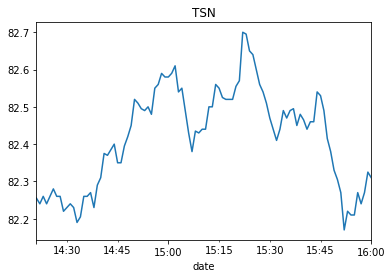

In [18]:
data['1. open'].plot()
plt.pyplot.title("TSN")
plt.pyplot.show()

______

#### Export intraday data to Excel file

Refer to the pandas.DataFrame documentation and create an Excel file that includes your time series data of your stock price:

In [19]:
data.to_excel("my_TSN_stock_to.xlsx")